## TEXT CLASSIFICATION
**0:'sadness'
1:'joy'
2:'love' 
3:'anger'
4:'fear'
5:'surprise'
NUMBER OF  DATA IN THE DATASET 16000+


# MODEL APPROACH
**1. Data (Text) Preprocessing:**
• Lower Case
• Remove links
• Remove next lines (\n)
• Words containing numbers
• Extra spaces
• Special characters
• Removal of stop words
• Stemming
• Lemmatization
**2. Featuring Engineering:**
• Convert the Text corpus to a matrix of word counts. (Vectorize the Text data)
Eg: Use Tf-IDF
**3. Model Building:**
1.Divide the dataset in to Train (70%), Test (20%) and Validation (10%) datasets.
2.Build at least 3 classification models
Step 1: Build model 1 and generate the classification report (Performance metrics using Confusion
Metrics) for both Training and Test datasets.
Step 2:
• Use grid search or binary search for Hyperparameter Tuning.
• Use atleast 2 values for each hyperparameters.
• Choose the best model parameters based on grid search and generate the classification report
(Performance metrics using Confusion Metrics) for both Training and Test datasets.
Step 3: Repeat step 1 and 2 for Model 2 and Model 3 as well.
Step 4: Now choose the final model based on the classification report (Performance metrics using
Confusion Metrics) for both Training, Test and validation datasets.
**4. Data Visualization: Input and Output plots**

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [3]:
df=pd.read_csv('Emotions_training.csv')
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


# lower case convertion

use the string in built fucntion "str.lower()" for the text column

In [3]:
#converting to lowercase
df['text']=df['text'].str.lower()

# REMOVING THE LINK

removal of the link using the regular expression of the pattern or starts with http\

In [19]:
#remove links
import re

text = df['text']

def remove_links(text):
    return re.sub(r'http\S+', '', text)

# Apply the function to remove links from each text in the 'text' column
df['text'] = df['text'].apply(remove_links)

# Remove next lines (\n)

In [5]:
#"\n" refers to the next line and by replacing the "\n" with empty string 
df['text'] = df['text'].str.replace('\n', '')

# Removal of Numbers

In [6]:
#remove words containing numbers
text=df['text']
def remove_words_with_numbers(text):
    words = text.split() 
    clean_words = [] 
    for word in words:
        has_digit = False
        for char in word:
            if char.isdigit():
                has_digit = True
                break
        if not has_digit:
            clean_words.append(word)  # If the word does not contain any digit, add it to the clean words list
    return' '.join(clean_words)  # Join the clean words list back to string
df['text'] = df['text'].apply(remove_words_with_numbers)


# REMOVE whitespaces

In [20]:
#strip() function used to remove trailing whitespaces
df['text'] = df['text'].str.strip()

# REMOVE Special characters and EMOJIS 

In [22]:
#remove special characters 
def remove_special_characters(text):
    special_characters = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"
    for char in special_characters:
        text = text.replace(char, '')
    return text

df['text'] = df['text'].apply(remove_special_characters)

In [23]:
#remove emojis
import emoji
import pandas as pd

# Assuming 'df' is your DataFrame with a 'content' column containing text with emojis
text = df['text']

# Define a function to remove emojis
def remove_emojis(text):
    return emoji.demojize(text)

# Applying remove_emojis() function to each element of the 'content' column
text_without_emojis = text.apply(remove_emojis)



# Removal of stop words using gensim library

**Gensim, a popular Python library for topic modeling and natural language processing, offers the remove_stopwords function to eliminate common stopwords from text data. By invoking this function, you can efficiently preprocess text by removing irrelevant words like "the," "is," and "and," facilitating downstream analysis tasks such as text classification or topic modeling.

In [24]:
from gensim.parsing.preprocessing import preprocess_string
df['text'] = [' '.join(preprocess_string(text)) for text in df['text']]


# Stemming

**Stemming is a natural language processing technique used to reduce words to their root or base form, enabling normalization and simplification of text data. It helps in improving text analysis tasks such as information retrieval, sentiment analysis, and topic modeling by treating variations of words as a single entity. Popular stemming algorithms include Porter Stemmer, Snowball Stemmer, and Lancaster Stemmer.

In [25]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


#Tokenization is the process of breaking down a text or document into smaller units

ps = PorterStemmer() #PorterStemmer is used for stemming, which is the process of reducing words to their base or root form


def stem_sentence(sentence):
    words = word_tokenize(sentence) 
    stemmed_words = [ps.stem(word) for word in words]
    return ' '.join(stemmed_words)


df['text'] = df['text'].apply(stem_sentence)



# difference between stemming and lemitizing
**Stemming involves stripping affixes from words to get to the root form. It's done using simple and fast heuristic algorithms, which may result in the stem not being a valid word. For example, "running" would be stemmed to "run".

**Lemmatization, on the other hand, considers the context and meaning of the word along with its morphology to reduce it to its base or dictionary form (lemma). It often requires more computational resources and linguistic knowledge but results in valid words.

# LEMITIZING

Lemmatization is a linguistic process used to reduce words to their base or canonical form, known as the lemma, by considering the word's meaning and context. Unlike stemming, which simply removes suffixes or prefixes, lemmatization ensures that the resulting word is a valid one found in the language's dictionary.

In [26]:
#lemitizing 
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yashas.m/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yashas.m/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()


def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens] #lemmatize each token in the list of tokens
    return ' '.join(lemmatized_tokens)


df['text'] = df['text'].apply(lemmatize_text)

**this below code helps in adding the different label classes into the respective arrays created for each labels 
and the displaying the count of each classes/label-0,1,2,3,4,5 that is sadness,joy,love,anger,fear and surprise

In [28]:
count = df['text'].count()# total count of the data/sample in the dataset
label=df['label'] 
text=df['text']
#creating the empty arrays 
label0 = []
label1 = []
label2 = []
label3 = []
label4 = []
label5 = []
#this for loop helps in appending the each sample/data into the respective labels array based on the if conditions
for i in range(count):
    if label[i] == 0:
        label0.append(text[i])
    elif label[i] == 1:
        label1.append(text[i])
    elif label[i] == 2:
        label2.append(text[i])
    elif label[i] == 3:
        label3.append(text[i])
    elif label[i] == 4:
        label4.append(text[i])
        
    elif label[i]==5:
        label5.append(text[i])
    else:
        pass
#displaying the length of each labels 
print("the count of sadness is:",len(label0))
print("the count of joy is:",len(label1))
print("the count of love is:",len(label2))
print("the count of anger is:",len(label3))
print("the count of fear is:",len(label4))
print("the count of surprise is :",len(label5))

the count of sadness is: 4666
the count of joy is: 5362
the count of love is: 1304
the count of anger is: 2159
the count of fear is: 1937
the count of surprise is : 572


**percentage of each  label in the dataset 

In [29]:
#individual percentage
l0=(len(label0)/count)*100
l1=(len(label1)/count)*100
l2=(len(label2)/count)*100
l3=(len(label3)/count)*100
l4=(len(label4)/count)*100
l5=(len(label5)/count)*100
print(f"the perecentage of leabel\n 0={l0}% \n 1={l1}% \n 2={l2}% \n 3={l3}% \n 4={l4}% \n 5={l5}%")

the perecentage of leabel
 0=29.1625% 
 1=33.5125% 
 2=8.15% 
 3=13.493749999999999% 
 4=12.106250000000001% 
 5=3.5749999999999997%


# BAR graph representation

**this helps to visualize the each label and helps in finding out whether the dataset is imbalanced!

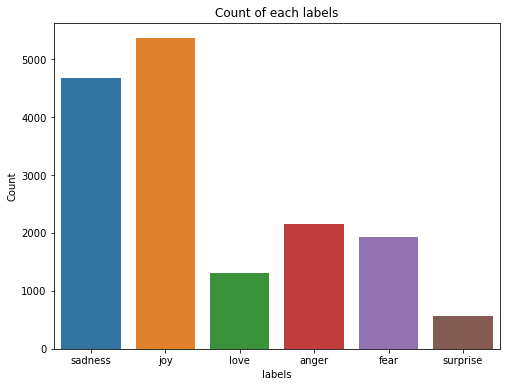

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['sadness', 'joy', 'love', 'anger','fear','surprise']
counts = [len(label0), len(label1), len(label2), len(label3), len(label4),len(label5)]


plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts)
plt.title('Count of each labels')
plt.xlabel('labels')
plt.ylabel('Count')
plt.show()


**In the above bar graph it denotes that the text related to the joy-1 is maximum and text related to the surprise  label -5 is minimum 

# Balancing the dataset classes 

**oversampling is better than under_sampling bcoz there might be some important data misses in the undersample due to less data or reduction od data size in each class

**resample module from scikit-learn's utils subpackage provides functions for resampling data, particularly useful for addressing class imbalance in classification tasks. It allows you to randomly oversample minority classes or undersample majority classes to balance the dataset, improving the performance of machine learning models.

**label-1 had the maximum samples / text so we have upsampled / increased the all minority classes until it reaches the label-1 sample count

In [31]:
from sklearn.utils import resample


# Count the number of samples in each class
class_counts = df['label'].value_counts()

# target count using maximum count among all the label 
target_count = class_counts.max()


resampled_data = []

# Loop through each class
for label in class_counts.index:
    # Extract data for the current class
    class_data = df[df['label'] == label]
    
    # Upsample (oversample) the class to match the target count
    sampled_data = resample(class_data, replace=True, n_samples=target_count, random_state=42)
    
    # Append the resampled data to the list
    resampled_data.append(sampled_data)

# Concatenate the resampled data for all classes
balanced_df = pd.concat(resampled_data)

# Displaying the count of samples in each class after balancing the dataset classes 
print(balanced_df['label'].value_counts())


1    5362
0    5362
3    5362
4    5362
2    5362
5    5362
Name: label, dtype: int64


In [123]:
balanced_df

,text,label
2491,feel glad justic serv west said,1
15585,feel valuabl know consid worth sacrif,1
15488,certainli felt appropri life supplic life life...,1
11161,feel assur futur onlin entertain rest good hand,1
9145,feel thank abl figur wai deal minor effect dealt,1
...,...,...
15825,feel game strang realiti swarm violent carnivo...,5
5319,talk district leader elder hill night explain ...,5
4775,know isnt real feel strang time,5
1756,feel kinda strang cau didnt encount feel year,5


**This graph represents that each labels are balanced with the total data of 5362 in each.

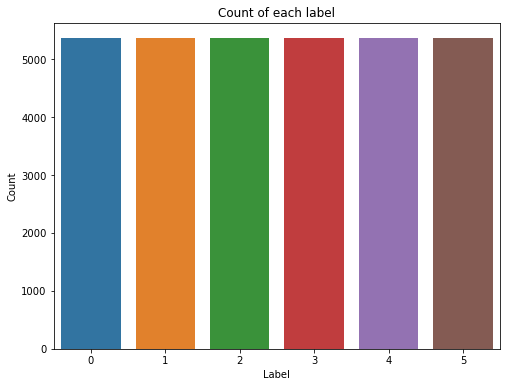

In [32]:
# Plot the count of each label
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=balanced_df)
plt.title('Count of each label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [33]:


# Handle NaN values by replacing them with an empty string
balanced_df['text'].fillna('', inplace=True)



In [34]:

#storing the values of each column under texts and labels 

texts = balanced_df['text'].values
labels = balanced_df['label'].values
#texts =df['text'].values
#labels = df['label'].values


**vectorization-
Text vectorization converts text data into numerical vectors, representing features such as word frequencies or semantic meanings. This transformation allows machine learning algorithms to process and analyze text, enabling tasks like sentiment analysis

In [35]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)

print(f"TF-IDF matrix shape: {X.shape}")


TF-IDF matrix shape: (32172, 5000)


## splitiing of dataset

30% of the dataset will be stored under temp and 70% of the dataset under training
In 30% temp will be divided into testing(20%) and  validation dataset(10%)

In [36]:
# Split the data into training (70%), testing (20%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=42)  # 0.3333 * 0.3 = 0.10

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}, Validation samples: {X_val.shape[0]}")


Training samples: 22520, Testing samples: 6434, Validation samples: 3218


### smote

SMOTE generates synthetic samples for the minority class by interpolating between existing samples, rather than simply duplicating them. This helps create a more balanced dataset.


In [38]:
# Balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)



## logistic regression

Logistic regression is used for text classification by converting text data into numerical features using techniques like TF-IDF or word embeddings. The model then learns to associate these features with class labels  through training. The trained logistic regression model can then predict the probability that a new text belongs to each class, enabling effective classification.

In [48]:


# Step 1: Build the initial model
lr_model = LogisticRegression(max_iter=1000)#to overcome the error (reached limit)
lr_model.fit(X_train_balanced, y_train_balanced)
train_predictions_lr = lr_model.predict(X_train_balanced)
test_predictions_lr = lr_model.predict(X_test)

print("Initial Logistic Regression Model")
print("Training Classification Report")
#print of the classification reprot of the training dataset
print(classification_report(y_train_balanced, train_predictions_lr))
print("Test Classification Report")
#print of the classification reprot of the testing dataset
print(classification_report(y_test, test_predictions_lr))



Initial Logistic Regression Model
Training Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3785
           1       0.96      0.91      0.94      3785
           2       0.94      0.97      0.96      3785
           3       0.96      0.97      0.96      3785
           4       0.97      0.95      0.96      3785
           5       0.96      1.00      0.98      3785

    accuracy                           0.96     22710
   macro avg       0.96      0.96      0.96     22710
weighted avg       0.96      0.96      0.96     22710

Test Classification Report
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1097
           1       0.93      0.87      0.90      1104
           2       0.91      0.94      0.93      1069
           3       0.92      0.96      0.94      1053
           4       0.95      0.93      0.94      1054
           5       0.95      1.00      0

the accuracy of the training dataset is 96% and testing dataset is 93%

## Hyperparameter tuning for the logistic regression

**GridSearchCV - GridSearchCV in machine learning is a technique for hyperparameter tuning that exhaustively searches over a specified parameter grid to find the optimal hyperparameters for a model. It uses cross-validation to evaluate model performance for each combination of parameters, ensuring robust and unbiased selection. This process helps improve model accuracy and generalizability by identifying the best set of parameters.

**Hyperparameter tuning for logistic regression is performed using `GridSearchCV` with a parameter grid for `C` and solver, optimizing over 5-fold cross-validation. The best parameters are identified, and the corresponding model is used to make predictions on the balanced training set and test set. Classification reports for both sets and the best parameters are printed to evaluate model performance.

The parameter grid specifies different values for two hyperparameters of logistic regression: 'C' and 'solver'. 'C' controls the regularization strength, with smaller values indicating stronger regularization. 'solver' determines the optimization algorithm, where 'liblinear' is suitable for small datasets while 'lbfgs' is better for larger datasets.

In [51]:
# Step 2: Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters
best_params = grid_search.best_params_
logreg_best = grid_search.best_estimator_

# Generate classification report with best parameters
y_train_pred_best_lr = logreg_best.predict(X_train_balanced)
y_test_pred_best_lr = logreg_best.predict(X_test)

print("Logistic Regression Model with Best Parameters")
print("Training Classification Report (Best Params):")
print(classification_report(y_train_balanced, y_train_pred_best_lr))
print("Test Classification Report (Best Params):")
print(classification_report(y_test, y_test_pred_best_lr))
print(best_params)

Logistic Regression Model with Best Parameters
Training Classification Report (Best Params):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3785
           1       0.99      0.97      0.98      3785
           2       0.98      0.99      0.99      3785
           3       0.99      0.99      0.99      3785
           4       0.99      0.98      0.99      3785
           5       0.99      1.00      0.99      3785

    accuracy                           0.99     22710
   macro avg       0.99      0.99      0.99     22710
weighted avg       0.99      0.99      0.99     22710

Test Classification Report (Best Params):
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1097
           1       0.95      0.90      0.92      1104
           2       0.94      0.98      0.96      1069
           3       0.95      0.97      0.96      1053
           4       0.97      0.96      0.97      10

after the hyperparameter tuning the model generated 99% of accuracy for the training dataset and 95% for the testing dataset and the best parameters are "C":10 and solver:"lbfgs"

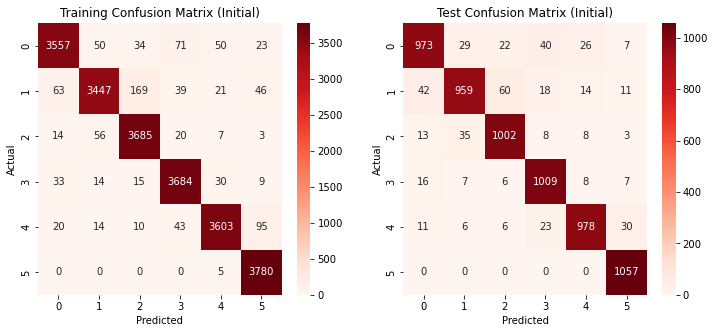

In [55]:
# Confusion Matrix for initial model(before hyperparameter tuning)
train_cm_initial = confusion_matrix(y_train_balanced, train_predictions_lr)
test_cm_initial = confusion_matrix(y_test, test_predictions_lr)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm_initial, annot=True, fmt='d', cmap='Reds')
plt.title('Training Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm_initial, annot=True, fmt='d', cmap='Reds')
plt.title('Test Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

this is the confusion matrix for the training dataset without hyperparamter tuning 
where this give wrong classifications for the  label love and  joy which  which is 169
the highest number of correct classification is given for suprise label which is  3780
TESTING DATASET CONFUSION MATRIX:
this gives highest number of wrong classification for the same class as in training dataset that is for label love and joy which is 60, the model predicted that it is love label but actual value is joy
the highest number of correct classification is given for suprise label which is  1057

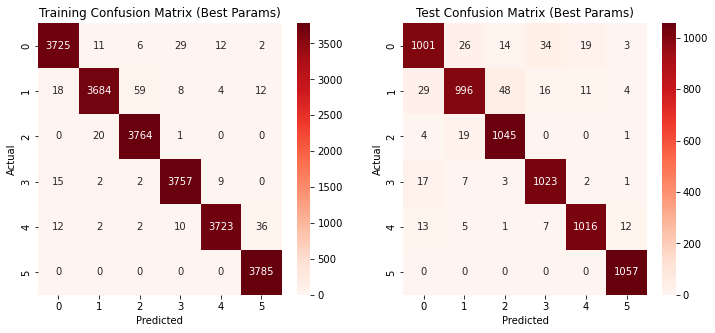

In [54]:
# Confusion Matrix for model with best parameters(after hyperparameter tuning)
train_cm_best_lr = confusion_matrix(y_train_balanced, y_train_pred_best_lr)
test_cm_best_lr = confusion_matrix(y_test, y_test_pred_best_lr)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm_best_lr, annot=True, fmt='d', cmap='Reds')
plt.title('Training Confusion Matrix (Best Params)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm_best_lr, annot=True, fmt='d', cmap='Reds')
plt.title('Test Confusion Matrix (Best Params)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

**AFTER HYPERPARAMETER TUNING**
**training dataset**
the highest number of correct classification is given for suprise label which is  3785
highest number of wrong classification for the same class as in training dataset that is for label love and joy which is 59, the model predicted that it is love label but actual value is joy,this is decreased when compared to the model without hyperparameter tuning
***testing dataset***
this gives highest number of wrong classification for the same class as in training dataset that is for label love and joy which is 48, the model predicted that it is love label but actual value is joy
the highest number of correct classification is given for suprise label which is  1057


**what we can understand is the misclassification is reduced compared to the normal model without hyperparamter tuning**

## random forest

Random Forest is an ensemble learning method used for classification and regression tasks. It builds multiple decision trees during training and combines their predictions through averaging (for regression) or voting (for classification). This technique improves predictive accuracy and reduces overfitting compared to individual trees. 

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Build the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Generate classification report for Training and Test datasets
y_train_pred_rf = rf.predict(X_train_balanced)
y_test_pred_rf= rf.predict(X_test)

print("Training Classification Report:\n", classification_report(y_train_balanced, y_train_pred_rf))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_rf))



Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3785
           1       1.00      0.99      1.00      3785
           2       1.00      1.00      1.00      3785
           3       1.00      1.00      1.00      3785
           4       1.00      0.99      1.00      3785
           5       1.00      1.00      1.00      3785

    accuracy                           1.00     22710
   macro avg       1.00      1.00      1.00     22710
weighted avg       1.00      1.00      1.00     22710

Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      1097
           1       0.97      0.90      0.93      1104
           2       0.93      1.00      0.96      1069
           3       0.96      0.98      0.97      1053
           4       0.96      0.98      0.97      1054
           5       0.97      1.00      0.98      1057

    accuracy   

it provides 100% accuracy for the training dataset and 96% accuracy for the testing dataset which might lead to overfitting of the model , to overcome this we can use hyperparameter tuning using Gridsearch or binarysearch.

'n_estimators' determines the number of decision trees in the forest, influencing model complexity and computational cost.
'max_depth' restricts the maximum depth of each tree, preventing overfitting by controlling tree complexity.

In [58]:
# Step 2: Hyperparameter Tuning using GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters
best_params = grid_search.best_params_
rf_best = grid_search.best_estimator_

# Generate classification report with best parameters
y_train_pred_best_rf = rf_best.predict(X_train_balanced)
y_test_pred_best_rf = rf_best.predict(X_test)

print("Training Classification Report (Best Params):\n", classification_report(y_train_balanced, y_train_pred_best_rf))
print("Test Classification Report (Best Params):\n", classification_report(y_test, y_test_pred_best_rf))
print(best_params)


Training Classification Report (Best Params):
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      3785
           1       0.82      0.83      0.82      3785
           2       0.87      0.92      0.89      3785
           3       0.93      0.92      0.93      3785
           4       0.98      0.84      0.90      3785
           5       0.90      1.00      0.95      3785

    accuracy                           0.89     22710
   macro avg       0.90      0.89      0.89     22710
weighted avg       0.90      0.89      0.89     22710

Test Classification Report (Best Params):
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1097
           1       0.80      0.78      0.79      1104
           2       0.84      0.91      0.87      1069
           3       0.90      0.91      0.90      1053
           4       0.94      0.82      0.88      1054
           5       0.89      0.99      0.9

after the hyperparameter tuning the accuracy is 89% for training dataset and 87% for the testing dataset 
which is quite less compare to the normal model .
and the best parameters are 'max_depth': 20, 'n_estimators': 200

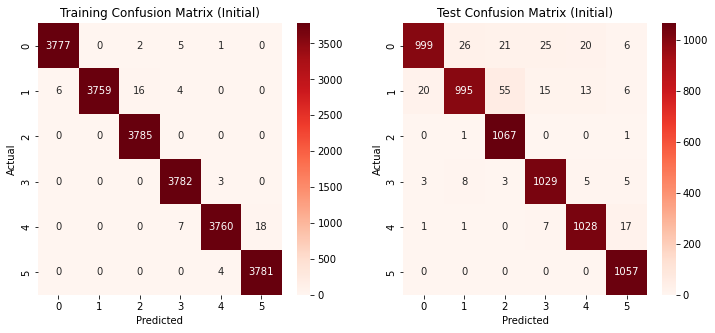

In [59]:
# Confusion Matrix for initial model
train_cm = confusion_matrix(y_train_balanced, y_train_pred_rf)
test_cm = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Training Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Test Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


**without hyperparamter tuning
**training dataset**
this gives highest number of wrong classification for the same class as in training dataset that is for label fear and surprise which is 16, the model predicted that it is surprise label but actual value is fear
the highest number of correct classification is given for LOVE label which is  3785
**testing dataset**
this gives highest number of wrong classification for the same class as in training dataset that is for label love and joy which is 55, the model predicted that it is love label but actual value is joy
the highest number of correct classification is given for love label which is  1067

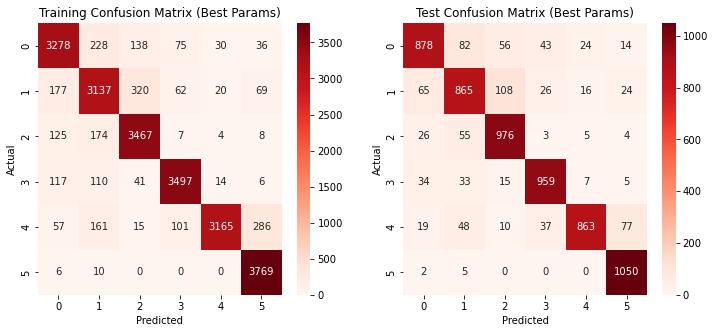

In [60]:
# Confusion Matrix for model with best parameters
train_cm_best = confusion_matrix(y_train_balanced, y_train_pred_best_rf)
test_cm_best = confusion_matrix(y_test, y_test_pred_best_rf)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm_best, annot=True, fmt='d', cmap='Reds')
plt.title('Training Confusion Matrix (Best Params)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm_best, annot=True, fmt='d', cmap='Reds')
plt.title('Test Confusion Matrix (Best Params)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

**after hyperparameter tuning**
**training dataset**
this gives highest number of wrong classification for the same class as in training dataset that is for label fear and surprise which is 286, the model predicted that it is surprise label but actual value is fear
the highest number of correct classification is given for suprise label which is  3769
**testing dataset**
this gives highest number of wrong classification for the same class as in training dataset that is for label joy and love which is 108, the model predicted that it is love label but actual value is joy
the highest number of correct classification is given for suprise label which is  1050

**this model generates more number of wrong classification 


## xgboost

XGBoost sequentially builds an ensemble of decision trees to minimize a predefined objective function iteratively. It incorporates regularization techniques to prevent overfitting and is highly efficient and scalable, delivering top-tier performance in supervised learning tasks.

In [62]:

# Step 1: Build the model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)

# Generate classification report for Training and Test datasets
y_train_pred_xgb = xgb_model.predict(X_train_balanced)
y_test_pred_xgb = xgb_model.predict(X_test)

print("Training Classification Report:\n", classification_report(y_train_balanced, y_train_pred_xgb))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_xgb))




Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      3785
           1       0.95      0.91      0.93      3785
           2       0.94      0.99      0.96      3785
           3       0.94      0.99      0.96      3785
           4       0.98      0.95      0.97      3785
           5       0.96      1.00      0.98      3785

    accuracy                           0.96     22710
   macro avg       0.96      0.96      0.96     22710
weighted avg       0.96      0.96      0.96     22710

Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      1097
           1       0.92      0.87      0.89      1104
           2       0.91      0.97      0.94      1069
           3       0.92      0.97      0.94      1053
           4       0.94      0.92      0.93      1054
           5       0.93      1.00      0.97      1057

    accuracy   

This model provided the 96% accuracy for the training dataset and 93% accuracy for trainig dataset

'n_estimators': Determines the number of trees to be built in the ensemble. Higher values can improve performance but increase computational cost.

'learning_rate': Controls the step size at each iteration of gradient boosting. Smaller values make the model more robust to overfitting but require more iterations for convergence.

In [63]:
#hyperparameter tuning
param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters
best_params = grid_search.best_params_
xgb_best = grid_search.best_estimator_

# Generate classification report with best parameters
y_train_pred_best_xgb = xgb_best.predict(X_train_balanced)
y_test_pred_best_xgb = xgb_best.predict(X_test)

print("Training Classification Report (Best Params):\n", classification_report(y_train_balanced, y_train_pred_best_xgb))
print("Test Classification Report (Best Params):\n", classification_report(y_test, y_test_pred_best_xgb))

print(best_params)

Training Classification Report (Best Params):
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      3785
           1       0.92      0.88      0.90      3785
           2       0.91      0.98      0.94      3785
           3       0.93      0.97      0.95      3785
           4       0.97      0.91      0.94      3785
           5       0.92      1.00      0.96      3785

    accuracy                           0.94     22710
   macro avg       0.94      0.94      0.94     22710
weighted avg       0.94      0.94      0.94     22710

Test Classification Report (Best Params):
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      1097
           1       0.90      0.86      0.88      1104
           2       0.88      0.96      0.92      1069
           3       0.90      0.95      0.92      1053
           4       0.93      0.89      0.91      1054
           5       0.91      1.00      0.9

**AFTER HYPERPARAMETR TUNING FOR XGBOOST**
this model provided 91% accuracy for testing dataset and 94% accuracy for training dataset
best parameters are 'learning_rate': 0.1, 'n_estimators': 200


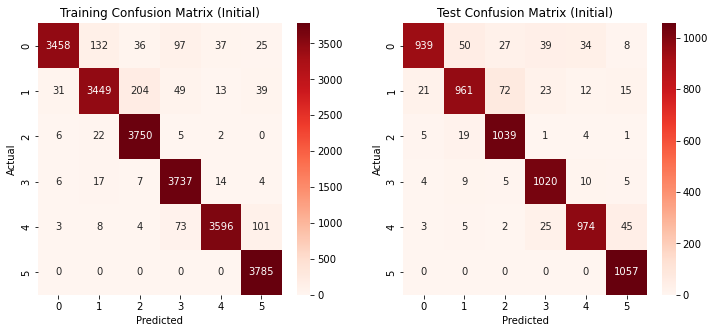

In [64]:
# Confusion Matrix for initial model
train_cm = confusion_matrix(y_train_balanced, y_train_pred_xgb)
test_cm = confusion_matrix(y_test, y_test_pred_xgb)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Training Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Test Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

**BEFORE HYPERPARAMETER TUNING**
**training dataset**
the highest number of correct classification is given for suprise label which is  3785
highest number of wrong classification for the same class as in training dataset that is for label love and joy which is 204, the model predicted that it is love label but actual value is joy.t
***testing dataset***
this gives highest number of wrong classification for the same class as in training dataset that is for label love and joy which is 72, the model predicted that it is love label but actual value is joy
the highest number of correct classification is given for suprise label which is  1057

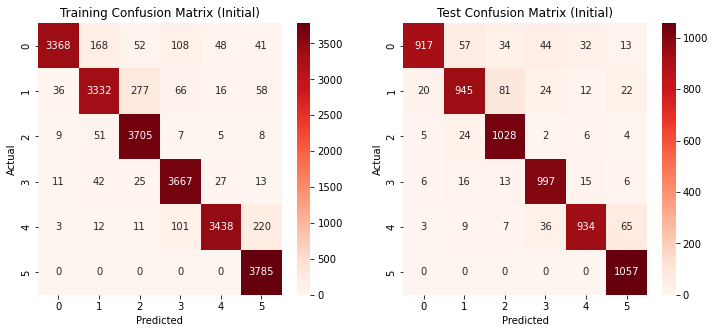

In [65]:
# Confusion Matrix for best model(after hyperparameter tuning)
train_cm = confusion_matrix(y_train_balanced, y_train_pred_best_xgb)
test_cm = confusion_matrix(y_test, y_test_pred_best_xgb)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Training Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Test Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

**BEFORE HYPERPARAMETER TUNING**
**training dataset**
the highest number of correct classification is given for suprise label which is  3785
highest number of wrong classification for the same class as in training dataset that is for label love and joy which is 277, the model predicted that it is love label but actual value is joy.
***testing dataset***
this gives highest number of wrong classification for the same class as in training dataset that is for label love and joy which is 81, the model predicted that it is love label but actual value is joy
the highest number of correct classification is given for suprise label which is  1057

the amount of prediction which is wrongly classified is increased from normal model to hyperparamter tuning 

## svm

'kernel': Specifies the type of kernel used for transforming the input data into higher-dimensional space. 'linear' indicates a linear kernel, suitable for linearly separable data.

'C': Represents the regularization parameter, controlling the trade-off between maximizing the margin and minimizing the classification error. Higher values of 'C' prioritize correct classification of training data points, potentially leading to overfitting.

'random_state': Sets the random seed for reproducibility, ensuring consistent results across multiple runs of the model.

SVM (Support Vector Machine) is a supervised learning algorithm used for classification and regression tasks. It finds the hyperplane that best separates different classes in the feature space, maximizing the margin between classes. SVM can handle high-dimensional data and is effective even in cases of small datasets.

In [67]:

# Create an SVM classifier with a linear kernel
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_train_svm= svm.predict(X_train_balanced)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_train_balanced, y_pred_train_svm))
print("Classification Report:\n", classification_report(y_train_balanced, y_pred_train_svm))



Accuracy: 0.9683399383531484
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      3785
           1       0.98      0.92      0.95      3785
           2       0.95      0.99      0.97      3785
           3       0.96      0.98      0.97      3785
           4       0.97      0.97      0.97      3785
           5       0.98      1.00      0.99      3785

    accuracy                           0.97     22710
   macro avg       0.97      0.97      0.97     22710
weighted avg       0.97      0.97      0.97     22710



The accuracy of the training dataset is 97%

In [68]:
#test the classifier
svm.fit(X_test, y_test)

# Make predictions
y_pred_test_svm= svm.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred_test_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_test_svm))

Accuracy: 0.9661175007771216
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1097
           1       0.97      0.92      0.95      1104
           2       0.94      0.98      0.96      1069
           3       0.96      0.98      0.97      1053
           4       0.98      0.96      0.97      1054
           5       0.96      1.00      0.98      1057

    accuracy                           0.97      6434
   macro avg       0.97      0.97      0.97      6434
weighted avg       0.97      0.97      0.97      6434



The accuracy of the testing dataset is 97% 
 the model has learned the underlying patterns in the training data well and is able to generalize effectively to unseen data.

'C': Controls the penalty for misclassification. Smaller values enforce a smoother decision boundary, while larger values allow more complex boundaries.

'kernel': Specifies the type of function used to transform the input data. 'linear' assumes a linear relationship between features, while 'rbf' handles non-linear relationships by projecting data into a higher-dimensional space.

In [79]:
param_grid = {
    'C': [0.1, 1],          # Regularization parameter
    'kernel': ['linear', 'rbf'] # Kernel type
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters
best_params = grid_search.best_params_
svm_best = grid_search.best_estimator_

# Generate classification report with best parameters
y_train_pred_best_svm = svm_best.predict(X_train_balanced)
y_test_pred_best_svm = svm_best.predict(X_test)

print("Training Classification Report (Best Params):\n", classification_report(y_train_balanced, y_train_pred_best_svm))
print("Test Classification Report (Best Params):\n", classification_report(y_test, y_test_pred_best_svm))

print("Best Hyperparameters:", best_params)



Training Classification Report (Best Params):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3785
           1       1.00      0.98      0.99      3785
           2       0.99      1.00      0.99      3785
           3       0.99      1.00      0.99      3785
           4       0.99      0.99      0.99      3785
           5       0.99      1.00      0.99      3785

    accuracy                           0.99     22710
   macro avg       0.99      0.99      0.99     22710
weighted avg       0.99      0.99      0.99     22710

Test Classification Report (Best Params):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1097
           1       0.94      0.92      0.93      1104
           2       0.96      0.98      0.97      1069
           3       0.96      0.96      0.96      1053
           4       0.98      0.97      0.97      1054
           5       0.98      1.00      0.9

***after the hyperparameter tuning*** the svm gives 99% accuracy for training dataset and 96 % for the testing datasest.

# All moddel train

This is the accuracy for thr training datasets for all the models which i have used .(considering the results of hyperparameter tuning)
logistic Regression: 98.8% 
random foreest:89%
svm:99%
xgboost:93%

In [83]:
result_train={}#dictionary
#logistic regression
lr_accuracy = accuracy_score(y_train_balanced, y_train_pred_best_lr)
result_train['Logistic Regression'] = lr_accuracy
#random forest
rf_accuracy = accuracy_score(y_train_balanced, y_train_pred_best_rf)
result_train['Random Forest'] = rf_accuracy

#xgboost
xgb_accuracy = accuracy_score(y_train_balanced, y_train_pred_best_xgb)
result_train['XGBoost'] = xgb_accuracy

#svm
svm_accuracy=accuracy_score(y_train_balanced,y_train_pred_best_svm)
result_train['SVM']=svm_accuracy
result_train

{'Logistic Regression': 0.9880228974020255,
 'Random Forest': 0.89445178335535,
 'XGBoost': 0.9376926464112726,
 'SVM': 0.9933949801849405}

# bar graph representation of each models
**Highest is SVM accuracy**

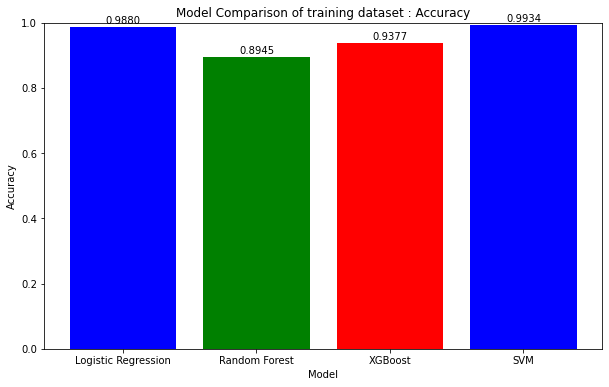

In [84]:
plt.figure(figsize=(10, 6))
plt.bar(result_train.keys(), result_train.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison of training dataset : Accuracy')
plt.ylim(0, 1)  
for i, (model, accuracy) in enumerate(result_train.items()):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha='center')

plt.show()


# ALL model  testing dataset accuracy

This is accuracy of the all the models using testing dataset(after hyperparameter tuning).
**SVM as the best accuracy for test dataset"**

In [85]:
results={}
#logistic regression
lr_accuracy = accuracy_score(y_test, y_test_pred_best_lr)
results['Logistic Regression'] = lr_accuracy
#random forest
rf_accuracy = accuracy_score(y_test, y_test_pred_best_rf)
results['Random Forest'] = rf_accuracy

#xgboost
xgb_accuracy = accuracy_score(y_test, y_test_pred_best_xgb)
results['XGBoost'] = xgb_accuracy

#svm
svm_accuracy=accuracy_score(y_test,y_test_pred_best_svm)
results['SVM']=svm_accuracy
results


{'Logistic Regression': 0.9539944047248989,
 'Random Forest': 0.8689773080509792,
 'XGBoost': 0.9135840845508237,
 'SVM': 0.9611439229095431}

# Confusion Matrix for the logistic regression, Random forest,XGboost algorithms

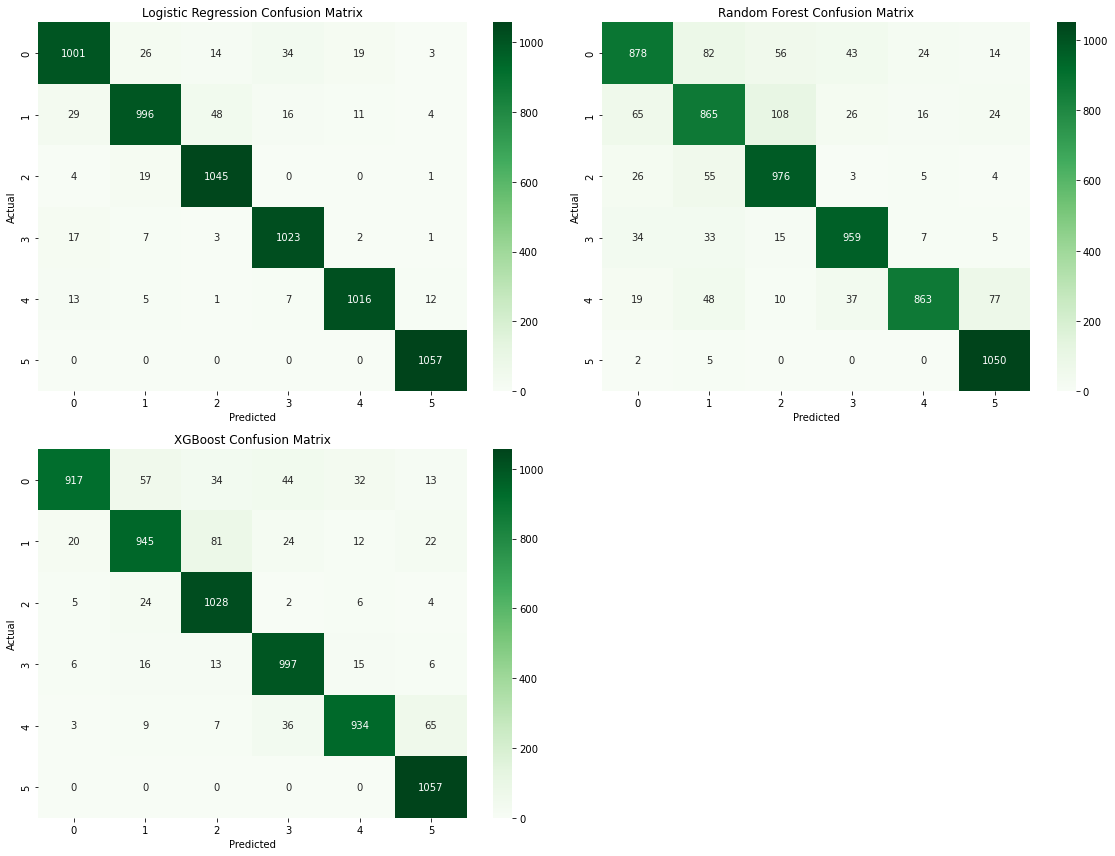

In [86]:

models = {
    'Logistic Regression': y_test_pred_best_lr,
    'Random Forest': y_test_pred_best_rf,
    'XGBoost': y_test_pred_best_xgb,
}

plt.figure(figsize=(16, 12))
for i, (model, predictions) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_test, predictions)
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


# Testing dataset Bar graph representation
**SVM as the best accuracy**

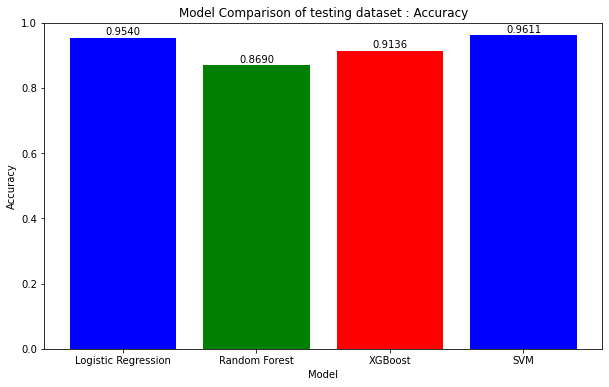

In [87]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison of testing dataset : Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
for i, (model, accuracy) in enumerate(results.items()):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha='center')

plt.show()


# select the best model (SVM)-based on the accuracy 

**The average of the testing dataset and training dataset accuracy as been calculated and Highest accuracy is considered for the selection of best model.

In [120]:
# Calculate average accuracy for each model(training and testing )
average_accuracies = {model: (results[model] + result_train[model]) / 2 for model in results}

# Find the model with the highest average accuracy
best_model_name = max(average_accuracies, key=average_accuracies.get)

# Print results
print("\nTest Accuracies:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")

print("\nTraining Accuracies:")
for model, accuracy in result_train.items():
    print(f"{model}: {accuracy:.4f}")

print("\nAverage Accuracies:")
for model, accuracy in average_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

print(f"Best Model based on Average Accuracy: {best_model_name}")


Test Accuracies:
Logistic Regression: 0.9540
Random Forest: 0.8690
XGBoost: 0.9136
SVM: 0.9611

Training Accuracies:
Logistic Regression: 0.9880
Random Forest: 0.8945
XGBoost: 0.9377
SVM: 0.9934

Average Accuracies:
Logistic Regression: 0.9710
Random Forest: 0.8817
XGBoost: 0.9256
SVM: 0.9773
Best Model based on Average Accuracy: SVM


# Best model is SVM since the accuracy is 97%.

**Classification report of the svm (training dataset  after hyperparameter tuning and testing dataset and validation dataset)**


In [116]:
# Train and evaluate the SVM model
svm_model = models['SVM']
svm_model.fit(X_train_balanced, y_train_balanced)
y_train_pred_svm = svm_model.predict(X_train_balanced)
y_test_pred_svm = svm_model.predict(X_test)
y_val_pred_svm = svm_model.predict(X_val)

train_report_svm = classification_report(y_train_balanced, y_train_pred_svm)
test_report_svm = classification_report(y_test, y_test_pred_svm)
val_report_svm = classification_report(y_val, y_val_pred_svm)

train_confusion_svm = confusion_matrix(y_train_balanced, y_train_pred_svm)
test_confusion_svm = confusion_matrix(y_test, y_test_pred_svm)
val_confusion_svm = confusion_matrix(y_val, y_val_pred_svm)

# Print performance metrics for SVM model
print("\nSVM Model Performance Metrics:")
print("Training Report:")
print(train_report_svm)
print("Test Report:")
print(test_report_svm)
print("Validation Report:")
print(val_report_svm)


# Choose the final model (SVM) based on the validation accuracy
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)

print(f"\nFinal Model (SVM) based on validation Accuracy: validation Accuracy = {val_accuracy_svm}")



SVM Model Performance Metrics:
Training Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3785
           1       1.00      0.98      0.99      3785
           2       0.99      1.00      0.99      3785
           3       0.99      1.00      0.99      3785
           4       0.99      0.99      0.99      3785
           5       0.99      1.00      0.99      3785

    accuracy                           0.99     22710
   macro avg       0.99      0.99      0.99     22710
weighted avg       0.99      0.99      0.99     22710

Test Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1097
           1       0.94      0.92      0.93      1104
           2       0.96      0.98      0.97      1069
           3       0.96      0.96      0.96      1053
           4       0.98      0.97      0.97      1054
           5       0.98      1.00      0.99      1057

    accuracy   

**Validtion dataset provides on 96%**

# Confusion matrix 

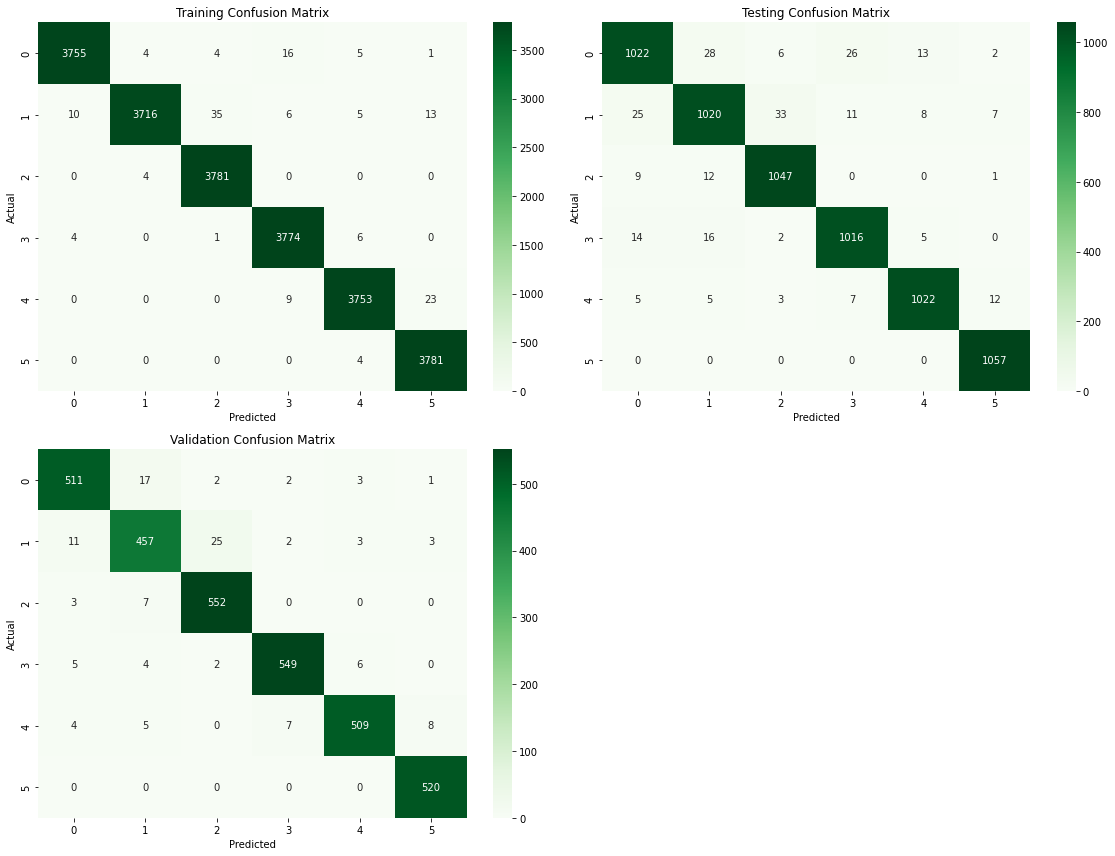

In [104]:
# Define confusion matrices for SVM model
svm_cm = {
    'Training': train_confusion_svm,
    'Testing': test_confusion_svm,
    'Validation': val_confusion_svm
}

# Plot confusion matrices
plt.figure(figsize=(16, 12))
for i, (dataset, cm) in enumerate(svm_cm.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'{dataset} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


***Training dataset***
the highest number of correct classification is given for suprise,Joy label which is  3781
highest number of wrong classification for the same class as in training dataset that is for label love and joy which is 35, the model predicted that it is love label but actual value is joy.
***Testing dataset***
this gives highest number of wrong classification for the same class as in training dataset that is for label love and joy which is 33, the model predicted that it is love label but actual value is joy
the highest number of correct classification is given for suprise label which is  1057
***Validation dataset***
this gives highest number of wrong classification for the same class as in training dataset that is for label love and joy which is 25, the model predicted that it is love label but actual value is joy
the highest number of correct classification is given for love label which is  552

## Bar Graph Representation SVM accuracy of testing ,training and validation dataset of  the SVM

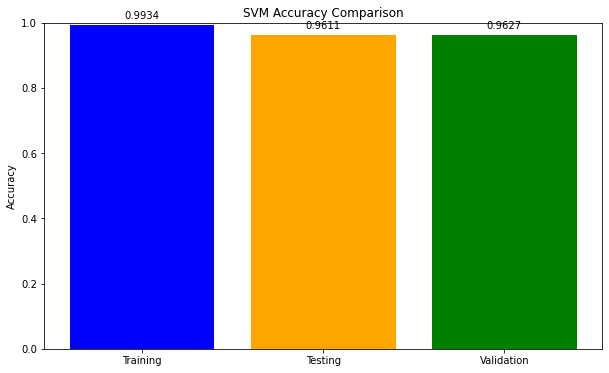

In [122]:

# Plot accuracy comparison
accuracies = {
    'Training': accuracy_score(y_train_balanced, y_train_pred_svm),
    'Testing': accuracy_score(y_test, y_test_pred_svm),
    'Validation': val_accuracy_svm
}

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green'])
plt.title('SVM Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for index, value in enumerate(accuracies.values()):
    plt.text(index, value + 0.02, f'{value:.4f}', ha='center')

plt.show()

# CONCLUSION
**In this machine learning project, we evaluated Logistic Regression, Random Forest, XGBoost, and Support Vector Machine (SVM) based on test accuracy, training accuracy, and average accuracy. SVM achieved the highest test accuracy (0.9611) and average accuracy (0.9773), indicating its strong generalization capability. Logistic Regression also performed well with a test accuracy of 0.9540 and an average accuracy of 0.9710. XGBoost showed balanced performance with a test accuracy of 0.9136 and an average accuracy of 0.9256, while Random Forest had the lowest test accuracy (0.8690) and average accuracy (0.8817). Based on these results, SVM is identified as the best performing model .**